<h1 align="center">EXPLORATORY DATA ANALYSIS</h1>

<p align="center">Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.</p>

---

## Loading the Data and Libraries
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# No. of flower for each species
data['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

---

## Dataset Information
---

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Dataset Description
Here, all the three classes have equal data points which clearly shows that it is a balanced dataset.

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Dataset description of the Setosa Class

In [6]:
iris_setosa = data.loc[data["species"]=="setosa"]
iris_setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


---

# BIVARIATE ANALYSIS

Bivariate analysis means the analysis of bivariate data. It is one of the simplest forms of statistical analysis, used to find out if there is a relationship between two sets of values.

---

## 2-D Scatter Plot

The main idea is to plot a 2d scatter plot by taking 2 features at a time then after that identifying that if we could be able to diffentiate the three classes of flower in the dataset


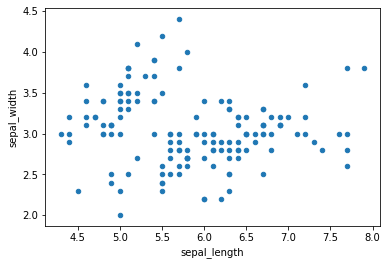

In [7]:
data.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.show()

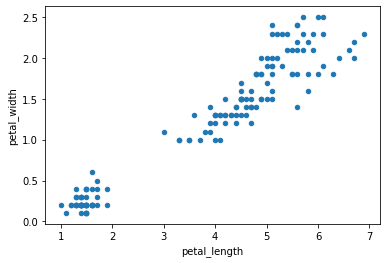

In [8]:
data.plot('petal_length','petal_width',kind='scatter')
plt.show()

### 2-D Scatter Plot of the Setosa Class

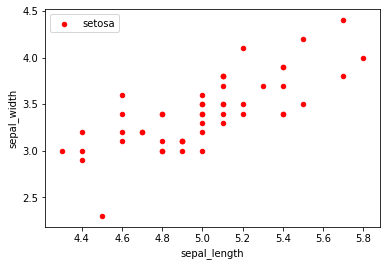

In [9]:
iris_setosa = data.loc[data["species"] == "setosa"]
iris_setosa.plot(x="sepal_length", y="sepal_width", kind="scatter", label='setosa',color='r')
plt.show()

### 2-D Scatter Plot of all the classes in different colors 

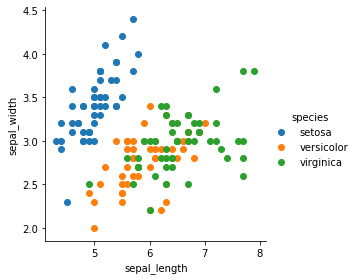

In [10]:
# Plot for sepal length versus sepal width
sns.FacetGrid(data,hue='species', height=4).map(plt.scatter,'sepal_length','sepal_width').add_legend()

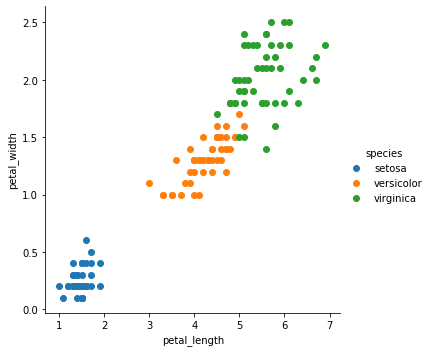

In [11]:
# Plot for petal length versus petal width
sns.FacetGrid(data,hue='species', height=5).map(plt.scatter,'petal_length','petal_width').add_legend()

#### It's clearly visible that petal length versus petal width distinguishes these species much better than sepal length versus sepal width does and now obviously we should check for more combinations.

Let's see them in different kind of plot known as pair plot.

---
## Pair Plot

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

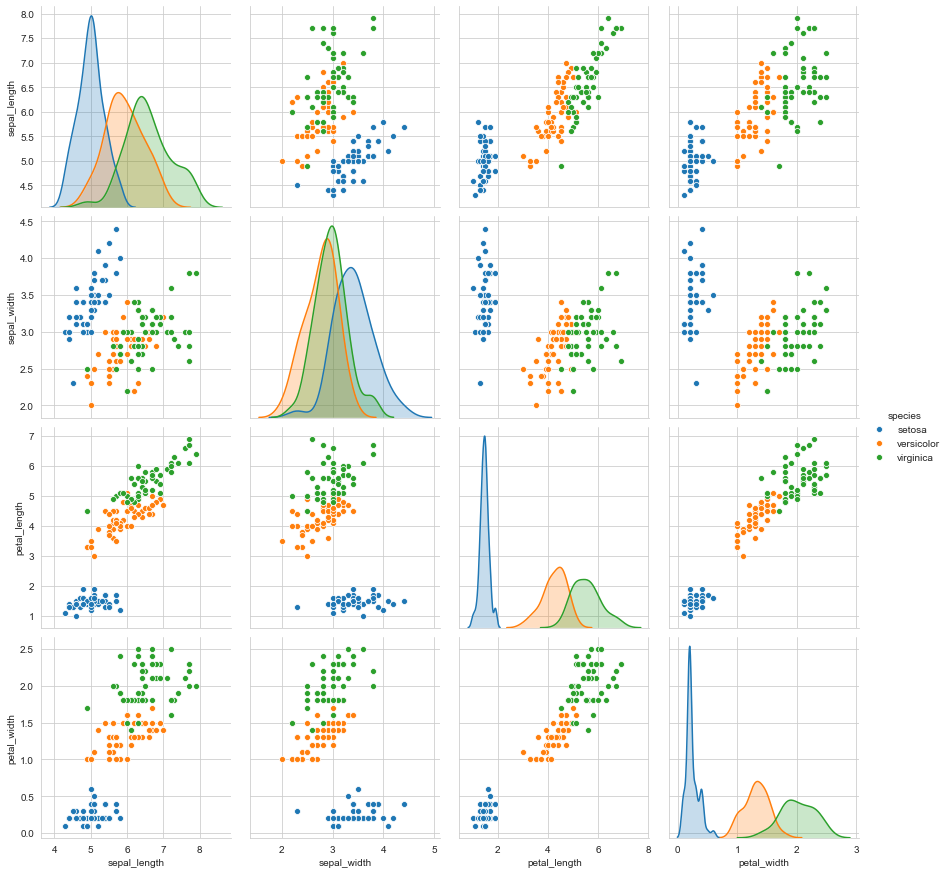

In [12]:
sns.set_style('whitegrid')
sns.pairplot(data,hue='species', height=3)

Looking at the pairplot we can conclude that petal length versus petal width is the best plot to classify these flowers into species.

---

# UNIVARIATE ANALYSIS

Univariate analysis is the simplest form of statistical analysis. The only keypoint is that in this type of analysis only one variable is involved.

---

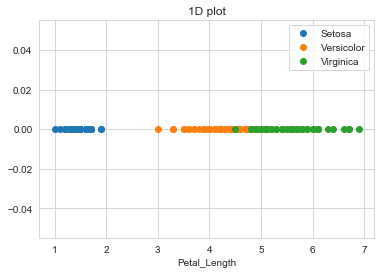

In [13]:
iris_setosa = data.loc[data["species"] == "setosa"]
iris_versicolor = data.loc[data["species"] == "versicolor"]
iris_virginica = data.loc[data["species"] == "virginica"]

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Petal_Length')
plt.title('1D plot')

plt.show()

---
## Histogram

A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

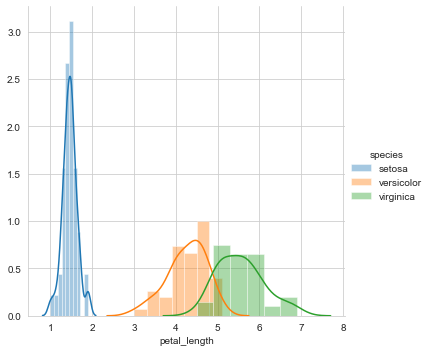

In [14]:
sns.FacetGrid(data, hue="species", height=5).map(sns.distplot, "petal_length").add_legend()
plt.show()

Once plotting the histogram for each feature it's clear that petal length and petal width is more beneficial.

---
## PDF (Probability Density Function)

The Probability Density Function(PDF) is the probability function which is represented for the density of a continuous random variable lying between a certain range of values. 

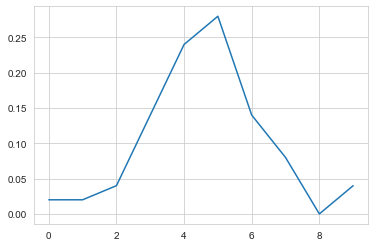

In [15]:
counts,x=np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf=counts/(sum(counts))
plt.plot(pdf)
plt.show()

---
## CDF (Cumulative Distribution Function)

The Cumulative Distribution Function (CDF), of a real-valued random variable X, evaluated at x, is the probability function that X will take a value less than or equal to x.

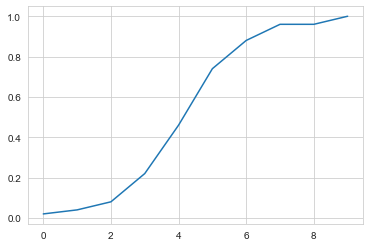

In [16]:
counts,x=np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(cdf)
plt.show()

#### Now plotting CDF(cummulative distributive function) and PDF(Probability Density function) to visualize what percentage of dataset is under a limit

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


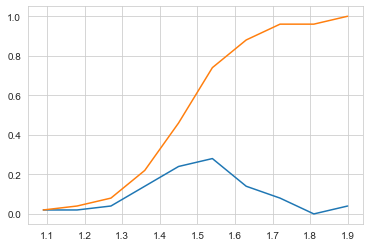

In [17]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density=True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

---
## Box Plot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

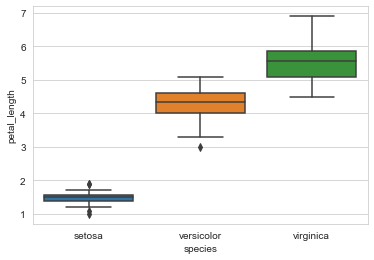

In [18]:
sns.boxplot(x='species',y='petal_length', data=data)
plt.show()

---
## Violin Plot

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side.

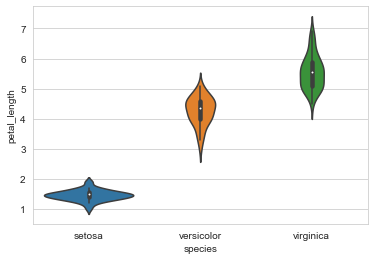

In [19]:
sns.violinplot(x="species", y="petal_length", data=data, size=8)
plt.show()

---

# MULTI-VARIATE ANALYSIS

Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

---

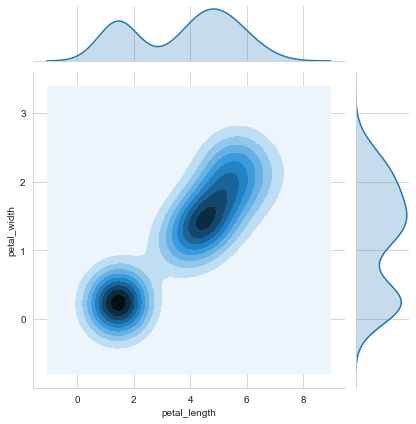

In [20]:
sns.jointplot(x="petal_length", y="petal_width", data=data, kind="kde")
plt.show()

 In this 2d plot Dark layer indicates more points and light layers or hills is called less points.
 These light to dark lines is called contours. This graph is called Contours probability density plot.